In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [2]:
class Esfera:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        #calculo de la distancia a las paredes
        #d_pared = [self.r[i] + self.radius if self.r[i] > 0 else self.r[i] - self.radius for i in range(len(self.r))]
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d
            
            # Falta implementar 
            
            self.f = np.add(self.f,Fn*self.n)
            
            # Aca debes agregar la energía potencial
        """
        # Fuerza de paredes
        if d_pared[0] <= -20 or d_pared[0] >= 20:
            self.v[0] *= -1
            
        if d_pared[1] <= -20 or d_pared[1] >= 20:
            self.v[1] *= -1
            # Aca debes agregar la energía potencial
        """


    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale]

    def GetForce(self,scale=1):
        return self.F[::scale]
    
    # Debes agregar las paredes en este punto

In [3]:
def GetEsferas(N,t):

    Esferas = []

    for i in range(10):
        r0 = np.array([np.random.uniform(-20,20),np.random.uniform(-20,20)])
        v0 = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
        a0 = np.array([0.,0.])
        p = Esfera(r0,v0,a0,t,m=1,radius=2,Id=i)
        Esferas.append(p)
    
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Esferas

In [4]:
dt = 0.001
tmax = 1
t = np.arange(0,tmax,dt)
Esferas = GetEsferas(1,t)

In [5]:
def RunSimulation(t,Esferas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Esferas)):
            for j in range(len(Esferas)):
                if i!=j:
                    Esferas[i].CalculateForce(Esferas[j])
        
        for i in range(len(Esferas)):
            Esferas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Esferas

In [6]:
Esferas = RunSimulation(t,Esferas)

Running simulation:   0%|          | 0/1000 [00:00<?, ? Steps/s]

Running simulation: 100%|██████████| 1000/1000 [00:00<00:00, 2399.11 Steps/s]


In [7]:
# Bajamos dimensión de la simulacion
scale = 50
t1 = t[::scale]

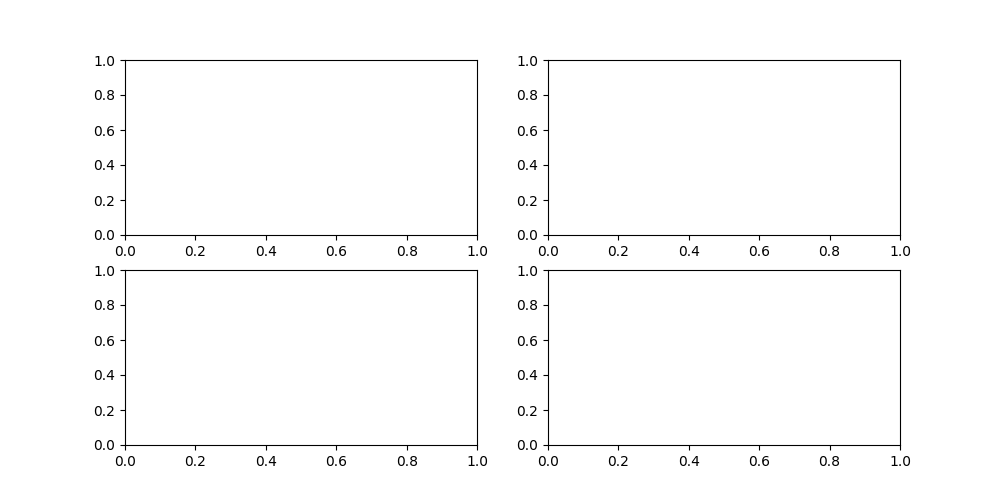

In [8]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

def init():
    ax.clear()
    ax.set_xlim(-20, 20)
    ax.set_ylim(-20, 20)

def Update(i):
    init()
    ax.set_title(r't =  %.3f s' % (t1[i]))

    KE = 0.0  # Kinetic energy
    P = 0.0  # Momentum
    F = 0.0  # Force

    for p in Esferas:
        x = p.GetPosition(scale)[i, 0]
        y = p.GetPosition(scale)[i, 1]

        vx = p.GetVelocity(scale)[i, 0]
        vy = p.GetVelocity(scale)[i, 1]

        circle = plt.Circle((x, y), p.radius, color='r', fill=False)
        ax.add_patch(circle)

        ax.arrow(x, y, vx, vy, color='k', head_width=0.5, length_includes_head=True)

        KE += p.GetKineticEnergy(scale)[i]

        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i], color='k', marker='.')

        P += p.GetMomentum(scale)[i]
        ax2.set_title(r'Total momentum: {:.3f}'.format(P))
        ax2.scatter(t1[:i], p.GetMomentum(scale)[:i], color='k', marker='.')

        F += F.GetForce(scale)[i]
        ax3.set_title(r'Total Force: {:.3f}'.format(F))
        ax3.scatter(t1[:i], p.GetForce(scale)[:i], color='k', marker='.')

    # Use ax2 for the third subplot

Animation = anim.FuncAnimation(fig, Update, frames=len(t1), init_func=init)
plt.show()
